In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas
import cv2
import os
import glob
from PIL import Image, ImageDraw, ImageFilter, ImageColor
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import math

# Detección de circulos

In [2]:
def deteccion_colores_circulos(img): 
    img2 = img.copy()
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    grayb = cv2.medianBlur(gray,5)
    
    circles = cv2.HoughCircles(grayb, cv2.HOUGH_GRADIENT,1,80,param1=100,param2=30,minRadius=50,maxRadius=100)
    circles = np.uint16(np.around(circles))
    img_colors = []
    for i in circles[0,:]:
      cv2.circle(img2, (i[0], i[1]), i[2], (255,0,0), 8)  
      r=i[2]
      x=int(i[0]-r+r/3+r/10)
      y=int(i[1]-r+r/3+r/10)
      image_color = img[y:int((y+((r-r/3-r/15)*2))), x:int((x+(2*(r-r/3-r/15))))]
      cx = int(image_color.shape[0]/2)
      cy = int(image_color.shape[0]/2)
      image_color = image_color[cx-10:cx+10,cy-10:cy+10,:]
      img_colors.append(image_color)
    
    # Visualización se puede borrar ----------------------------------------
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.subplot(1,3,2)
    plt.imshow(grayb,cmap='gray')
    plt.subplot(1,3,3)
    plt.imshow(img2)
    plt.show()
    
    print(len(img_colors), 'circulos detectados')
    print('imagenes colores',img_colors[0].shape)
    
    plt.figure()
    plt.subplot(4,4,1)
    plt.imshow(img_colors[0])
    plt.subplot(4,4,2)
    plt.imshow(img_colors[1])
    plt.subplot(4,4,3)
    plt.imshow(img_colors[2])
    plt.subplot(4,4,4)
    plt.imshow(img_colors[3])
    plt.subplot(4,4,5)
    plt.imshow(img_colors[4])
    plt.subplot(4,4,6)
    plt.imshow(img_colors[5])
    plt.subplot(4,4,7)
    plt.imshow(img_colors[6])
    plt.subplot(4,4,8)
    plt.imshow(img_colors[7])
    plt.subplot(4,4,9)
    plt.imshow(img_colors[8])
    plt.subplot(4,4,10)
    plt.imshow(img_colors[9])
    plt.subplot(4,4,11)
    plt.imshow(img_colors[10])
    plt.subplot(4,4,12)
    plt.imshow(img_colors[11])
    plt.subplot(4,4,13)
    plt.imshow(img_colors[12])
    plt.subplot(4,4,14)
    plt.imshow(img_colors[13])
    plt.subplot(4,4,15)
    plt.imshow(img_colors[14])
    plt.subplot(4,4,16)
    plt.imshow(img_colors[15])
    plt.show()
    # Termina Visualización se puede borrar --------------------------------
    
    colors = []
    nr,nc,nch = img_colors[0].shape
    for imgc in img_colors:
        Ximgc = np.reshape(imgc,(nr*nc,nch))
        colors.append(np.mean(Ximgc,axis=0))
    return colors

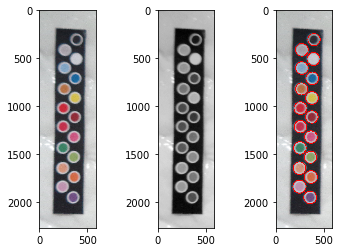

17 circulos detectados
imagenes colores (20, 20, 3)


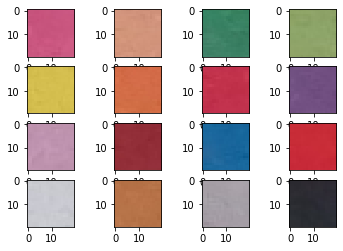

In [3]:
img1 = cv2.imread('PalCol1.jpeg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
colors1 = deteccion_colores_circulos(img1)

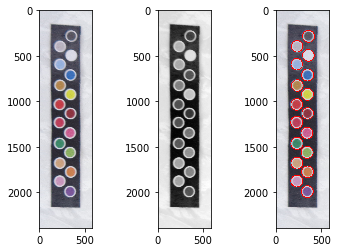

17 circulos detectados
imagenes colores (20, 20, 3)


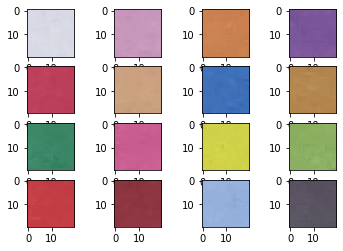

In [4]:
img2 = cv2.imread('PalCol2.jpeg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
colors2 = deteccion_colores_circulos(img2)

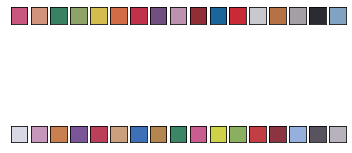

In [5]:
def crear_imagen_20_20(color):
    t = 20
    m = np.vstack((np.repeat(color[0],t*t,axis=0),np.repeat(color[1],t*t,axis=0),np.repeat(color[2],t*t,axis=0)))
    m = np.transpose(m)
    m = np.reshape(m,(t,t,3))
    return m
    
def pintar_colores(colors1,colors2):
    # pal1 y pal2 deben tener el mismo tamaño
    n = len(colors1)
    colors1 = np.uint16(colors1)
    colors2 = np.uint16(colors2)
    
    plt.figure()
    for i in range(n):
        plt.subplot(2,n,i+1)
        m = crear_imagen_20_20(colors1[i])
        plt.imshow(m)
        plt.xticks([])
        plt.yticks([])
    for i in range(n):
        plt.subplot(2,n,n+i+1)
        m = crear_imagen_20_20(colors2[i])
        plt.imshow(m)
        plt.xticks([])
        plt.yticks([])
    plt.show()
    
pintar_colores(colors1,colors2)

In [6]:
def mapear_colores(colors1,colors2):
    n = len(colors1)
    mtrx = [[] for _ in range(n)]
    tabu = [0 for _ in range(n)]
    res = [0 for _ in range(n)]

    for index in range(n):
      auxindex = 0
      min = 1000000
      actmin = 0

      for i in range(n):
        actmin = abs(colors1[index][0]-colors2[i][0])+abs(colors1[index][1]-colors2[i][1])+abs(colors1[index][2]-colors2[i][2])
        mtrx[index].append(actmin)

    for j in range(n):
      min = 1000000

      for i in range(n):
        actmin = np.argmin(mtrx[i])

        if min > mtrx[i][actmin] and not tabu[i]:

          min = mtrx[i][actmin]
          col = actmin
          fil = i

      #En tabu se guarda 1 si ya se usó la fila
      tabu[fil] = 1

      #print("Min of "+str(fil)+":",min,col)
      res[fil] = col

      #print(tabu)
      for i in range(n):
        mtrx[i][col] = 1000000
    res = np.array(res)
    colors1 = np.array(colors1)
    colors2 = np.array(colors2)
    return colors1, colors2[res]
    #return res
    
def mapear_colores2(colors1,colors2):
    n = len(colors1)
    colors1 = np.uint16(colors1)
    colors2 = np.uint16(colors2)
    md = np.zeros((n,n))
    for i in range(n):
        u = colors1[i]
        for j in range(i,n):
            v = colors2[j]
            md[i,j] = md[j,i] = np.sqrt(np.dot(u-v,u-v))
    #dfmd = pandas.DataFrame(np.round(md))
    #print(dfmd)
    maxi = np.max(md)+1000
    
    idx = np.zeros(n,int)
    for i in range(n):
        j = np.argmin(md[i,:])
        idx[i] = j
        md[:,j] = maxi
    
    colors2 = colors2[idx]
    return colors1,colors2
cm1,cm2 = mapear_colores(colors1,colors2)

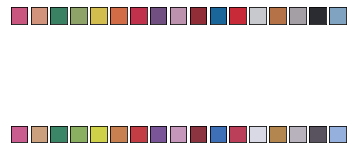

[201  86 127] [201  93 143]
[209 147 123] [202 160 126]
[ 58 129  99] [ 59 134 102]
[141 163 103] [139 175  97]
[211 189  78] [207 209  72]
[210 108  70] [201 128  80]
[193  49  75] [195  61  69]
[113  79 129] [122  86 153]
[189 146 174] [198 151 187]
[145  45  55] [140  53  65]
[ 26 102 155] [ 62 112 184]
[200  43  55] [188  63  90]
[200 201 207] [216 217 229]
[182 114  71] [178 134  78]
[164 158 165] [183 178 188]
[43 43 50] [89 83 96]
[128 163 194] [149 176 220]


In [7]:
pintar_colores(cm1,cm2)

cm1 = np.uint16(cm1)
cm2 = np.uint16(cm2)
for c1,c2 in zip(cm1,cm2):
    print(c1,c2)

# Matrices para calibración de colores

In [8]:
# Calculo de las matrices - version uno con multiplicación matrices NO FUNCIONA
print('cm1',cm1.shape)
print('cm2',cm2.shape)

B = cm1
R = cm2
#print('B',B)
#print('R',R)
Bt = np.transpose(B)
BtB = np.matmul(Bt,B)
BtB_ = np.linalg.inv(BtB)
m = np.matmul(np.matmul(BtB_,Bt),R)
print(m)

# Verificación
R_ = np.matmul(B,m)
print(R)
print(R_)

cm1 (17, 3)
cm2 (17, 3)
[[ 814.24977858  590.36404293  459.4161917 ]
 [ 526.3464484   381.0684725   297.12287847]
 [-868.36815808 -628.38412621 -488.2963549 ]]
[[201  93 143]
 [202 160 126]
 [ 59 134 102]
 [139 175  97]
 [207 209  72]
 [201 128  80]
 [195  61  69]
 [122  86 153]
 [198 151 187]
 [140  53  65]
 [ 62 112 184]
 [188  63  90]
 [216 217 229]
 [178 134  78]
 [183 178 188]
 [ 89  83  96]
 [149 176 220]]
[[ 98647.24397947  71630.27723452  55881.58500682]
 [140741.84819283 102111.90290522  79634.59554659]
 [ 29156.73135067  21188.91894719  16633.65130553]
 [111161.76958575  80631.92607034  62914.18766472]
 [203553.4656966  147574.79251558 115005.92479627]
 [167052.09886228 121144.95520994  94385.92628784]
 [117813.57138045  85483.80597166  66604.11942484]
 [ 21572.1020098   15753.99389693  12396.50727838]
 [ 79643.73011059  57875.96313734  45246.03473415]
 [ 93991.55937689  68189.74054536  53129.57780755]
 [-59739.23252331 -43181.09025186 -33434.58042197]
 [137722.60430177  9989

In [9]:
# Optimización Evolución Diferencial
from scipy.optimize import differential_evolution

B = cm1 # Matriz de color 1  -> nx3  donde n es el número de colores 
R = cm2 # Matriz de color 2  -> nx3  donde n es el número de colores
def func(mv):
    m = np.reshape(mv,(3,3))
    return np.sum(np.abs(R-np.matmul(B,m)))

bounds = np.zeros((9,2))
bounds[:,0] = -1000
bounds[:,1] = 1000
mv = np.zeros((9))
result = differential_evolution(func,bounds)
print(result)
mv = result.x
m = np.reshape(mv,(3,3))
print('m',m)

# Verificación
R_ = np.matmul(B,m)
print(R)
print(R_)

     fun: 342.98160818126473
     jac: array([  29.00000027,   59.00000133,   30.44126515, -163.00000425,
        -33.00000344,  -61.55872825, -169.99999843,   -4.00000317,
        -32.55873366])
 message: 'Optimization terminated successfully.'
    nfev: 42530
     nit: 305
 success: True
       x: array([ 0.89179832,  0.06123768,  0.02236282,  0.02491269,  1.04987235,
       -0.17016933,  0.1576118 , -0.03009148,  1.26209111])
m [[ 0.89179832  0.06123768  0.02236282]
 [ 0.02491269  1.04987235 -0.17016933]
 [ 0.1576118  -0.03009148  1.26209111]]
[[201  93 143]
 [202 160 126]
 [ 59 134 102]
 [139 175  97]
 [207 209  72]
 [201 128  80]
 [195  61  69]
 [122  86 153]
 [198 151 187]
 [140  53  65]
 [ 62 112 184]
 [188  63  90]
 [216 217 229]
 [178 134  78]
 [183 178 188]
 [ 89  83  96]
 [149 176 220]]
[[201.41065241  98.7761779  150.14593512]
 [209.43426595 163.42865887 134.89614401]
 [ 70.54160793 136.00626222 104.29221976]
 [146.03834723 176.66428388 105.41094084]
 [205.17166465 208.9998

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Xr [[184 185 189]
 [180 181 184]
 [180 181 184]
 ...
 [223 226 232]
 [222 225 231]
 [223 226 232]]


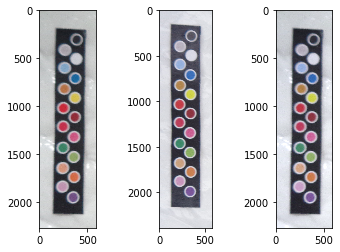

In [10]:
# Calcular la imagen nueva
nrows,ncols,nch = img1.shape
Xb = np.reshape(img1,(nrows*ncols,3))
Xr = np.matmul(Xb,m)
Xr = np.uint16(Xr)
print('Xr',Xr)
imgr = np.reshape(Xr,(nrows,ncols,3))

plt.figure()
plt.subplot(1,3,1)
plt.imshow(img1)
plt.subplot(1,3,2)
plt.imshow(img2)
plt.subplot(1,3,3)
plt.imshow(imgr)
plt.show()